# Daily Motivation Quotes


## Business Understanding

In a world filled with daily challenges and responsibilities, staying motivated is essential for personal growth and well-being. This data science project is dedicated to curating and delivering a diverse collection of carefully selected quotes. These inspirational snippets, sourced from various outlets including historical figures, popular literature, and notable personalities, aim to provide a source of encouragement, reflection, and empowerment for individuals facing the hustle of everyday life.

#### Objectives:

The primary objectives of this project are as follows:
1.	Curate Inspirational Quotes:
Gather a diverse collection of quotes from the Good Reads website, which boasts an extensive compilation of quotes spanning various genres and themes.
2.	Daily Motivational Updates: Develop a system to provide users with daily updates featuring a thoughtfully chosen quote. These updates will cater to different areas of life, ensuring a comprehensive and relatable experience.
3.	Tag-based Grouping: Implement a categorization mechanism that tags each quote based on its thematic content. This grouping will enable users to easily identify quotes that resonate with their specific preferences or current situations.


## Data Understanding

•	Source quotes from the Good Reads website, exploring the wide array of authors and themes available.

•	Analyze the structure of the collected data, including metadata such as author names, publication dates, and associated tags.


In [1]:

import pandas as pd

import scrapy 
import zipfile
import pickle
import string


import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk import FreqDist
import plotly.express as px

from langdetect import detect
from googletrans import Translator


from sklearn.metrics.pairwise import cosine_similarity, linear_kernel


from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split
from sklearn.neighbors import  KNeighborsRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.utils import resample
from sklearn.svm import SVC


import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from textblob import TextBlob



from my_functions import (translate_to_english, preprocess_text, preprocesss_text,
                          compress_tags, clean_text, aggregate_statistics, plot_histograms, sentiment_categories, 
                          correlation_analysis, save_results, load_results, QuoteFinder)

In [2]:
# Reading the new file 
quotes_2 = pd.read_csv(r'data\quotes_2.csv')

#Read the data into a data frame
tweets = pd.read_csv(r'data/Tweets.csv')

In [3]:
quotes_2

,Author Name,Tags,quote,author,quote_2,author_2
0,Oscar Wilde,"['attributed-no-source', 'be-yourself', 'gilbe...",“Be yourself; everyone else is already taken.”,Oscar Wilde,“Be yourself; everyone else is already taken.”,Oscar Wilde
1,Marilyn Monroe,"['attributed-no-source', 'best', 'life', 'love...","“I'm selfish, impatient and a little insecure....",Marilyn Monroe,"“I'm selfish, impatient and a little insecure....",Marilyn Monroe
2,Albert Einstein,"['attributed-no-source', 'human-nature', 'humo...",“Two things are infinite: the universe and hum...,Albert Einstein,“Two things are infinite: the universe and hum...,Albert Einstein
3,Frank Zappa,"['books', 'humor']","“So many books, so little time.”",Frank Zappa,"“So many books, so little time.”",Frank Zappa
4,Marcus Tullius Cicero,"['attributed-no-source', 'books', 'simile', 's...",“A room without books is like a body without a...,Marcus Tullius Cicero,“A room without books is like a body without a...,Marcus Tullius Cicero
...,...,...,...,...,...,...
2995,"A.A. Milne,",NaN,“I'm not lost for I know where I am. But howev...,"A.A. Milne, Winnie-the-Pooh",“I'm not lost for I know where I am. But howev...,"A.A. Milne,"
2996,Henry David Thoreau,NaN,“Dreams are the touchstones of our characters.”,Henry David Thoreau,“Dreams are the touchstones of our characters.”,Henry David Thoreau
2997,"Cassandra Clare,",NaN,“Black hair and blue eyes are my favorite comb...,"Cassandra Clare, Clockwork Angel",“Black hair and blue eyes are my favorite comb...,"Cassandra Clare,"
2998,"Nicholas Sparks,",NaN,“In times of grief and sorrow I will hold you ...,"Nicholas Sparks, The Notebook",“In times of grief and sorrow I will hold you ...,"Nicholas Sparks,"


Below we will perform some Data wrangling techniques to ensure we have comprehensive data to work with. 

In [4]:
# Drop duplicate rows across all columns
quotes_2 = quotes_2.drop_duplicates()

In [5]:
quotes_2

,Author Name,Tags,quote,author,quote_2,author_2
0,Oscar Wilde,"['attributed-no-source', 'be-yourself', 'gilbe...",“Be yourself; everyone else is already taken.”,Oscar Wilde,“Be yourself; everyone else is already taken.”,Oscar Wilde
1,Marilyn Monroe,"['attributed-no-source', 'best', 'life', 'love...","“I'm selfish, impatient and a little insecure....",Marilyn Monroe,"“I'm selfish, impatient and a little insecure....",Marilyn Monroe
2,Albert Einstein,"['attributed-no-source', 'human-nature', 'humo...",“Two things are infinite: the universe and hum...,Albert Einstein,“Two things are infinite: the universe and hum...,Albert Einstein
3,Frank Zappa,"['books', 'humor']","“So many books, so little time.”",Frank Zappa,"“So many books, so little time.”",Frank Zappa
4,Marcus Tullius Cicero,"['attributed-no-source', 'books', 'simile', 's...",“A room without books is like a body without a...,Marcus Tullius Cicero,“A room without books is like a body without a...,Marcus Tullius Cicero
...,...,...,...,...,...,...
2995,"A.A. Milne,",NaN,“I'm not lost for I know where I am. But howev...,"A.A. Milne, Winnie-the-Pooh",“I'm not lost for I know where I am. But howev...,"A.A. Milne,"
2996,Henry David Thoreau,NaN,“Dreams are the touchstones of our characters.”,Henry David Thoreau,“Dreams are the touchstones of our characters.”,Henry David Thoreau
2997,"Cassandra Clare,",NaN,“Black hair and blue eyes are my favorite comb...,"Cassandra Clare, Clockwork Angel",“Black hair and blue eyes are my favorite comb...,"Cassandra Clare,"
2998,"Nicholas Sparks,",NaN,“In times of grief and sorrow I will hold you ...,"Nicholas Sparks, The Notebook",“In times of grief and sorrow I will hold you ...,"Nicholas Sparks,"


In [6]:
# Replace missing values with the most common value of each column in: 'Tags'
quotes_2 = quotes_2.fillna({'Tags': quotes_2['Tags'].mode()[0]})

In [7]:
q_2 = quotes_2.groupby('Author Name').sum()
q_2

,Tags,quote,author,quote_2,author_2
Author Name,,,,,
"A. A. Milne,",['antolini'],“It is more fun to talk with someone who doesn...,"A. A. Milne, Winnie-the-Pooh",“It is more fun to talk with someone who doesn...,"A. A. Milne,"
A.A. Milne,"['happiness', 'hope', 'inspirational', 'new-ye...","“Weeds are flowers, too, once you get to know ...",A.A. MilneA.A. MilneA.A. MilneA.A. MilneA.A. M...,"“Weeds are flowers, too, once you get to know ...",A.A. MilneA.A. MilneA.A. MilneA.A. MilneA.A. M...
"A.A. Milne,",['live-death-love']['activism']['dave-matthews...,"“Piglet sidled up to Pooh from behind. ""Pooh!""...","A.A. Milne, The House at Pooh CornerA.A. Miln...","“Piglet sidled up to Pooh from behind. ""Pooh!""...","A.A. Milne,A.A. Milne,A.A. Milne,A.A. Milne,A...."
A.J. Cronin,['writing'],"“Worry never robs tomorrow of its sorrow, but ...",A.J. Cronin,"“Worry never robs tomorrow of its sorrow, but ...",A.J. Cronin
Abigail Van Buren,['life'],“The best index to a person's character is how...,Abigail Van Buren,“The best index to a person's character is how...,Abigail Van Buren
...,...,...,...,...,...
جلال الدين الرومي,['love'],“لا تجزع من جرحك، وإلا فكيف للنور أن يتسلل إلى...,جلال الدين الرومي,“لا تجزع من جرحك، وإلا فكيف للنور أن يتسلل إلى...,جلال الدين الرومي
عباس محمود العقاد,['love'],“ليس هناك كتابا أقرأه و لا أستفيد منه شيئا جدي...,عباس محمود العقاد,“ليس هناك كتابا أقرأه و لا أستفيد منه شيئا جدي...,عباس محمود العقاد
غسان كنفاني,['identity'],“!لك شيء في هذا العالم.. فقم”,غسان كنفاني,“!لك شيء في هذا العالم.. فقم”,غسان كنفاني


### EDA

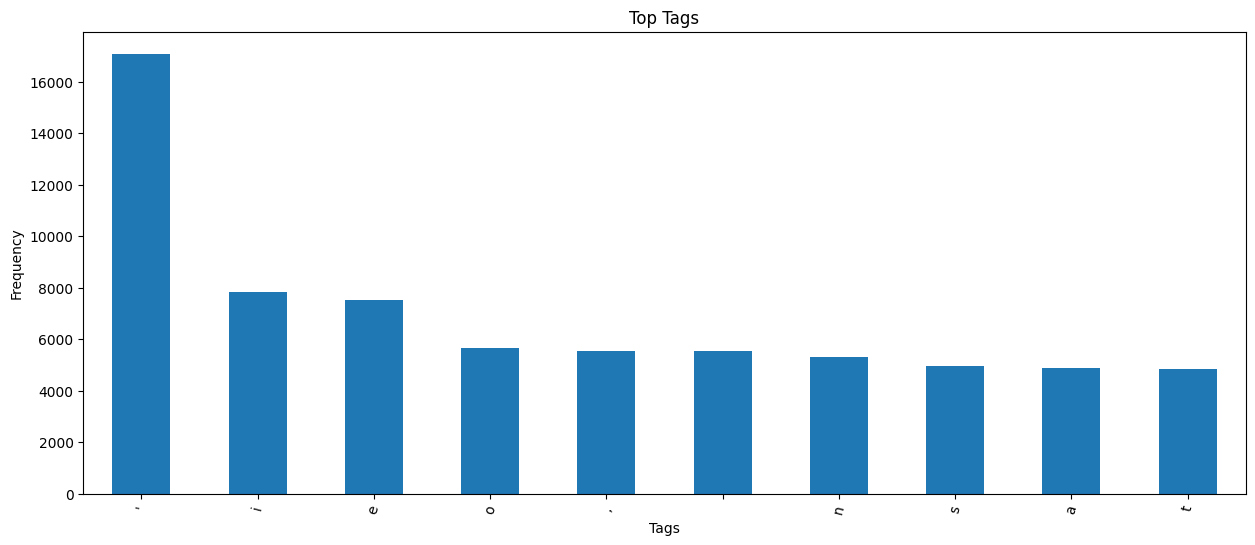

In [8]:
# Extract the 'Tags' column
Tags = quotes_2['Tags']

# Flatten the list of Tags
flat_Tags = [tag for sublist in Tags for tag in sublist]

# Count the frequency of each keyword
keyword_counts = pd.Series(flat_Tags).value_counts().head(10)

# Select the top Tags
top_Tags = keyword_counts.head(20) 

# Plot the top Tags
plt.figure(figsize=(15, 6))
top_Tags.plot(kind='bar')
plt.title('Top Tags')
plt.xlabel('Tags')
plt.ylabel('Frequency')
plt.xticks(rotation=75)
# save the figure
#plt.savefig(".data/images/Tags_plot")
plt.show()

In [9]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27481 entries, 0 to 27480
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   textID         27481 non-null  object
 1   text           27480 non-null  object
 2   selected_text  27480 non-null  object
 3   sentiment      27481 non-null  object
dtypes: object(4)
memory usage: 858.9+ KB


In [10]:
tweets['token_text'] = tweets['selected_text'].apply(preprocesss_text)

In [11]:
tweets['token_text']

0                           responded going
1                                  sooo sad
2                                  bullying
3                               leave alone
4                                      sons
                        ...                
27476                                  lost
27477                                 force
27478                              yay good
27479                                 worth
27480    flirting going atg smiles yay hugs
Name: token_text, Length: 27481, dtype: object

Top selected_text:
good     1253
day      1074
love      911
happy     854
like      774
get       774
go        704
got       659
work      624
going     594
Name: count, dtype: int64


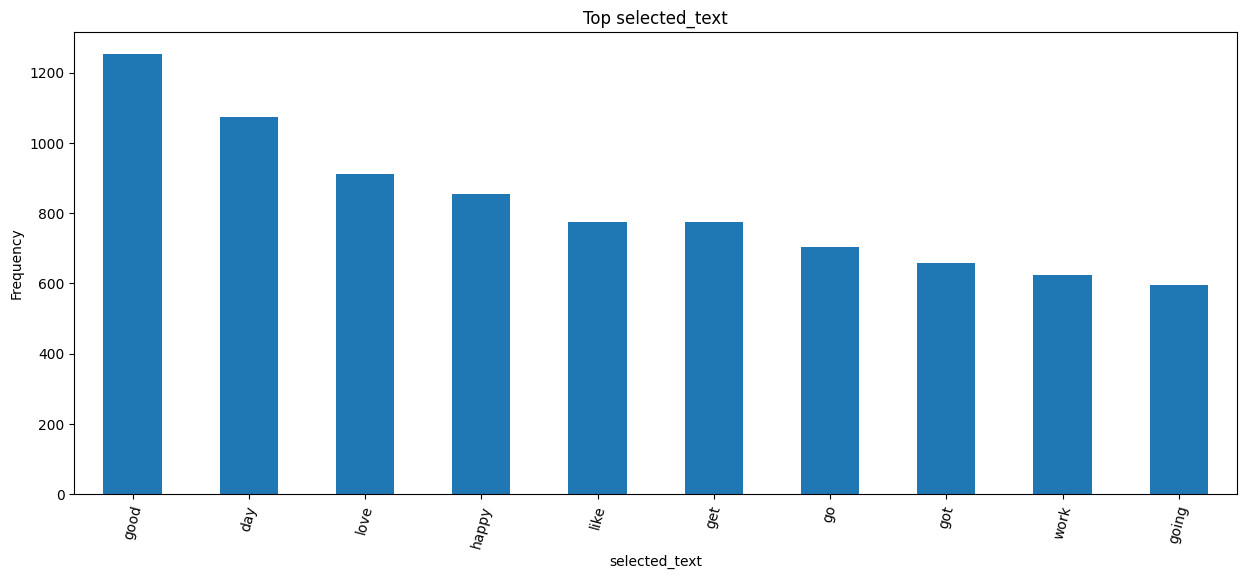

In [12]:
# Extract the 'selected_text' column
selected_text = tweets['token_text']

# Filter out any non-string values
selected_text = selected_text.loc[selected_text.apply(lambda x: isinstance(x, str))]

# Replace any non-alphanumeric characters with a space
selected_text = selected_text.str.replace(r'[^a-zA-Z0-9\\s]', ' ', regex=True)

# Filter out any empty strings or strings with fewer than three characters
selected_text = selected_text.str.strip().str.replace(r'\\s+', ' ').str.split()

# Flatten the list of selected_text
flat_selected_text = [text for sublist in selected_text for text in sublist]

# Count the frequency of each text
text_counts = pd.Series(flat_selected_text).value_counts()

# Select the top selected_text
top_selected_text = text_counts.head(10)

# Check if top_selected_text Series is not empty
if not top_selected_text.empty:
    print("Top selected_text:")
    print(top_selected_text)

    plt.figure(figsize=(15, 6))
    top_selected_text.plot(kind='bar')
    plt.title('Top selected_text')
    plt.xlabel('selected_text')
    plt.ylabel('Frequency')
    plt.xticks(rotation=75)
    plt.show()
else:
    print("Top selected_text is empty. Cannot plot.")


### Modelling

To build a model that recommends a quote based on a tweet, we can treat this as a text similarity problem where the goal is to find the quote that is most similar to a given tweet. We'll use vectorization techniques to convert text data into numerical form that machine learning models can process.

For Modelling, we will need to gather a data frame of tweets/posts so that we can train the model to reply with an appropriate quote. for this we will get a precleaned data frame from Kaggle and get the tweets since the twitter/X API limited access to pulling tweets and we do not want to go against their regulations. 

In [13]:
quotes_2.head(10)

,Author Name,Tags,quote,author,quote_2,author_2
0,Oscar Wilde,"['attributed-no-source', 'be-yourself', 'gilbe...",“Be yourself; everyone else is already taken.”,Oscar Wilde,“Be yourself; everyone else is already taken.”,Oscar Wilde
1,Marilyn Monroe,"['attributed-no-source', 'best', 'life', 'love...","“I'm selfish, impatient and a little insecure....",Marilyn Monroe,"“I'm selfish, impatient and a little insecure....",Marilyn Monroe
2,Albert Einstein,"['attributed-no-source', 'human-nature', 'humo...",“Two things are infinite: the universe and hum...,Albert Einstein,“Two things are infinite: the universe and hum...,Albert Einstein
3,Frank Zappa,"['books', 'humor']","“So many books, so little time.”",Frank Zappa,"“So many books, so little time.”",Frank Zappa
4,Marcus Tullius Cicero,"['attributed-no-source', 'books', 'simile', 's...",“A room without books is like a body without a...,Marcus Tullius Cicero,“A room without books is like a body without a...,Marcus Tullius Cicero
5,Bernard M. Baruch,"['ataraxy', 'be-yourself', 'confidence', 'fitt...","“Be who you are and say what you feel, because...",Bernard M. Baruch,"“Be who you are and say what you feel, because...",Bernard M. Baruch
6,William W. Purkey,"['dance', 'heaven', 'hurt', 'inspirational', '...",“You've gotta dance like there's nobody watchi...,William W. Purkey,“You've gotta dance like there's nobody watchi...,William W. Purkey
7,Dr. Seuss,"['attributed-no-source', 'dreams', 'love', 're...",“You know you're in love when you can't fall a...,Dr. Seuss,“You know you're in love when you can't fall a...,Dr. Seuss
8,Mae West,"['humor', 'life']","“You only live once, but if you do it right, o...",Mae West,"“You only live once, but if you do it right, o...",Mae West
9,Mahatma Gandhi,"['action', 'change', 'inspirational', 'misattr...",“Be the change that you wish to see in the wor...,Mahatma Gandhi,“Be the change that you wish to see in the wor...,Mahatma Gandhi


In [14]:
tweets.head(10)

,textID,text,selected_text,sentiment,token_text
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,responded going
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,sooo sad
2,088c60f138,my boss is bullying me...,bullying me,negative,bullying
3,9642c003ef,what interview! leave me alone,leave me alone,negative,leave alone
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,sons
5,28b57f3990,http://www.dothebouncy.com/smf - some shameles...,http://www.dothebouncy.com/smf - some shameles...,neutral,http shameless plugging best rangers forum earth
6,6e0c6d75b1,2am feedings for the baby are fun when he is a...,fun,positive,fun
7,50e14c0bb8,Soooo high,Soooo high,neutral,soooo high
8,e050245fbd,Both of you,Both of you,neutral,
9,fc2cbefa9d,Journey!? Wow... u just became cooler. hehe....,Wow... u just became cooler.,positive,wow u became cooler


In [15]:
tweets_sample = tweets.sample(3000).reset_index(drop=True)

In [16]:
tweets_sample.head(10)

,textID,text,selected_text,sentiment,token_text
0,039547e4e8,http://twitpic.com/4wdgr - Yay! I`m a blonde a...,http://twitpic.com/4wdgr - Yay! I`m a blonde a...,neutral,http yay blonde feel girly
1,a6e4af800f,http://twitpic.com/4wmaw - pink.green.. Love it.!,Love it.!,positive,love
2,97dfc59d35,Playing with my puppy,Playing with my puppy,positive,playing puppy
3,507d4b7d30,that sucks - I`m still hungry and sucked down...,that sucks,negative,sucks
4,758072a936,if mom gets paid...,if mom gets paid...,neutral,mom gets paid
5,c3e78308f0,Trying to stay upbeat while I wait to get my k...,Trying to stay upbeat while I wait to get my k...,neutral,trying stay upbeat wait get keys locked car
6,d246b4cbb3,Thank you Google for your Adsense Payment. If...,Thank you,positive,thank
7,486806238c,@ Barbs trying to figure out y the dsl aint co...,@ Barbs trying to figure out y the dsl aint co...,neutral,barbs trying figure dsl aint connecting need g...
8,fa9e1c5550,went with john grisham instead... she was ver...,pleased,positive,pleased
9,0f8050afef,Good Luck,Good,positive,good


In [17]:
# Preprocess quotes
quotes_2['processed_quote'] = quotes_2['quote_2'].apply(lambda x: ' '.join([word.lower() for word in word_tokenize(x) if word.isalnum()]))
# Preprocess tweets
tweets_sample['processed_text'] = tweets_sample['token_text'].apply(lambda x: ' '.join([word.lower() for word in word_tokenize(str(x)) if word.isalnum()]))


First, let's split the data into training and testing sets. This is crucial for evaluating the performance of our models accurately.

In [18]:
# creating test and training datasets
tweets_train, tweets_test, quotes_train, quotes_test = train_test_split(tweets_sample, quotes_2, test_size=0.2, random_state=42)

We'll use TF-IDF (Term Frequency-Inverse Document Frequency) vectorization, which helps in reflecting the importance of words to a document in a collection.

We'll use cosine similarity to find the most similar quotes to a tweet.

To evaluate, we'll see how well the recommended quotes match the actual quotes in the test set. We'll use a simple accuracy measure for demonstration, where a correct recommendation is counted if the recommended quote is exactly the same as the actual quote.

In [19]:
vectorizer = TfidfVectorizer()
tweets_train_vec = vectorizer.fit_transform(tweets_train)
tweets_test_vec = vectorizer.transform(tweets_test)
quotes_vec = vectorizer.transform(quotes_2)  # Vectorize all quotes for recommendation


def recommend_quote(tweet_vec, quotes_vec, quotes):
    # Calculate cosine similarity between the tweet and all quotes
    similarities = cosine_similarity(tweet_vec, quotes_vec)

    # Get the index of the most similar quote
    most_similar_idx = similarities.argmax()

    return quotes.iloc[most_similar_idx]

correct_predictions = 0
for tweet, actual_quote in zip(tweets_test, quotes_test):
    tweet_vec = vectorizer.transform([tweet])
    recommended_quote = recommend_quote(tweet_vec, quotes_vec, quotes_2)
    
    # Check if both recommended_quote and actual_quote are equal (element-wise)
    if recommended_quote.equals(actual_quote):
        correct_predictions += 1

accuracy = correct_predictions / len(tweets_test)
print(f"Accuracy: {accuracy:.2f}")



Accuracy: 0.00


An accuracy of 0.00 means that none of the recommendations made by our system match the actual quotes in the test dataset. In other words, our recommendation system is not making correct predictions at all.

In [20]:
# Ensure combined_text is a list or iterable of raw text documents
combined_text = quotes_2['processed_quote'].tolist()

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(stop_words=stopwords.words('english'))
tfidf_matrix = tfidf_vectorizer.fit_transform(combined_text)

# Calculate cosine similarity between tweets and quotes
cosine_similarities = linear_kernel(tfidf_matrix, tfidf_matrix)

# Initialize an empty list for recommendations
tweet_recommendations = []

# Iterate through each tweet and recommend a quote
for i, row in tweets_sample.iterrows():
    # Find the indices of quotes with highest similarity to the tweet
    most_similar_index = cosine_similarities[i].argsort()[-1]
    # Check if any similar quotes are found
    if cosine_similarities[i][most_similar_index] > 0:
        # Get the most similar quote
        recommended_quote = quotes_2.iloc[most_similar_index]['quote']
        tweet_recommendations.append(recommended_quote)
    else:
        # Handle the case when no similar quotes are found
        tweet_recommendations.append("No similar quotes found.")

# Add the recommendations to the tweets_sample DataFrame
tweets_sample['recommended_quote'] = tweet_recommendations

# Display the final recommendations
tweets_sample[['text', 'recommended_quote']]

,text,recommended_quote
0,http://twitpic.com/4wdgr - Yay! I`m a blonde a...,“Be yourself; everyone else is already taken.”
1,http://twitpic.com/4wmaw - pink.green.. Love it.!,"“I'm selfish, impatient and a little insecure...."
2,Playing with my puppy,“Two things are infinite: the universe and hum...
3,that sucks - I`m still hungry and sucked down...,"“So many books, so little time.”"
4,if mom gets paid...,“A room without books is like a body without a...
...,...,...
2995,tom is not with u! hahahahahahhah he`s with ...,“I'm not lost for I know where I am. But howev...
2996,Ever been to a restaurant with over 200 items ...,“Dreams are the touchstones of our characters.”
2997,gettn ready to take a trip to Jersey my dad`s ...,“Black hair and blue eyes are my favorite comb...
2998,character designs complete! .... in about a we...,“In times of grief and sorrow I will hold you ...


It looks like the code successfully generated recommendations for each tweet, matching them with quotes. The table shows the text of each tweet along with the recommended quote. Essentially randomly assigning a quote to a tweet which is not what we are going after. <br>

Since that has proved not to be effective, we will proceed with another  approach. Below we will go ahead and do sentiment analysis for the quotes, thereby mapping the sentiment wether positive, negative or neutral. <br>
Sentiment analysis is a common natural language processing (NLP) task that involves determining the emotional tone behind words to gain an understanding of the attitudes, opinions, and emotions expressed within an online mention. In Python, there are several libraries that can help you perform sentiment analysis, such as TextBlob and Vader Sentiment.<br>
For our case we will use TextBlob and we will follow the following steps. 
First, you'll need to install the TextBlob library. You can do this using pip: pip install textblob 
Then restart kernel and import it with the other packages. 

In [21]:
quotes_blob = quotes_2['quote_2']

# Lists to store polarity and subjectivity scores
polarity_scores = []
subjectivity_scores = []

# Iterate through each quote
for quote in quotes_blob:
    blob = TextBlob(quote)
    sentiment = blob.sentiment
    # Get polarity and subjectivity scores
    polarity = sentiment.polarity
    subjectivity = sentiment.subjectivity
    # Print quote and sentiment
    print(f"Quote: {quote}")
    print(f"Sentiment: {sentiment}")
    print()
    # Append polarity and subjectivity scores to lists
    polarity_scores.append(polarity)
    subjectivity_scores.append(subjectivity)
    
# Add polarity and subjectivity scores as new columns in the quotes_2 DataFrame
quotes_2['polarity'] = polarity_scores
quotes_2['subjectivity'] = subjectivity_scores

# Print all polarity and subjectivity scores
print("Polarity Scores:", polarity_scores)
print("Subjectivity Scores:", subjectivity_scores)


Quote: “Be yourself; everyone else is already taken.”
Sentiment: Sentiment(polarity=0.0, subjectivity=0.0)

Quote: “I'm selfish, impatient and a little insecure. I make mistakes, I am out of control and at times hard to handle. But if you can't handle me at my worst, then you sure as hell don't deserve me at my best.”
Sentiment: Sentiment(polarity=-0.14739583333333334, subjectivity=0.7506944444444444)

Quote: “Two things are infinite: the universe and human stupidity; and I'm not sure about the universe.”
Sentiment: Sentiment(polarity=-0.2833333333333333, subjectivity=0.662962962962963)

Quote: “So many books, so little time.”
Sentiment: Sentiment(polarity=0.15625, subjectivity=0.5)

Quote: “A room without books is like a body without a soul.”
Sentiment: Sentiment(polarity=0.0, subjectivity=0.0)

Quote: “Be who you are and say what you feel, because those who mind don't matter, and those who matter don't mind.”
Sentiment: Sentiment(polarity=0.0, subjectivity=0.0)

Quote: “You've gotta 

Polarity indicates the sentiment orientation of the quote (positive, negative, or neutral), with values closer to 1 indicating more positive sentiment, closer to -1 indicating more negative sentiment, and around 0 indicating neutral sentiment. <br>
Subjectivity measures how subjective or opinionated the quote is, with values closer to 1 indicating more subjective content and around 0 indicating more objective or factual content.


In [22]:
def get_sentiment_category(polarity):
    if polarity > 0:
        return "positive"
    elif polarity < 0:
        return "negative"
    else:
        return "neutral"
    
# Perform sentiment analysis and add a new column with the sentiment category
quotes_2['sentiment'] = quotes_2['quote_2'].apply(lambda x: get_sentiment_category(TextBlob(x).sentiment.polarity))
quotes_2.head()

,Author Name,Tags,quote,author,quote_2,author_2,processed_quote,polarity,subjectivity,sentiment
0,Oscar Wilde,"['attributed-no-source', 'be-yourself', 'gilbe...",“Be yourself; everyone else is already taken.”,Oscar Wilde,“Be yourself; everyone else is already taken.”,Oscar Wilde,be yourself everyone else is already taken,0.000000,0.000000,neutral
1,Marilyn Monroe,"['attributed-no-source', 'best', 'life', 'love...","“I'm selfish, impatient and a little insecure....",Marilyn Monroe,"“I'm selfish, impatient and a little insecure....",Marilyn Monroe,i selfish impatient and a little insecure i ma...,-0.147396,0.750694,negative
2,Albert Einstein,"['attributed-no-source', 'human-nature', 'humo...",“Two things are infinite: the universe and hum...,Albert Einstein,“Two things are infinite: the universe and hum...,Albert Einstein,two things are infinite the universe and human...,-0.283333,0.662963,negative
3,Frank Zappa,"['books', 'humor']","“So many books, so little time.”",Frank Zappa,"“So many books, so little time.”",Frank Zappa,so many books so little time,0.156250,0.500000,positive
4,Marcus Tullius Cicero,"['attributed-no-source', 'books', 'simile', 's...",“A room without books is like a body without a...,Marcus Tullius Cicero,“A room without books is like a body without a...,Marcus Tullius Cicero,a room without books is like a body without a ...,0.000000,0.000000,neutral


In [40]:
# Calculate aggregate statistics
stats = aggregate_statistics(polarity_scores, subjectivity_scores)

# Plot histograms
plot_histograms(polarity_scores, subjectivity_scores)

# Calculate sentiment categories
categories = sentiment_categories(polarity_scores)

# Perform correlation analysis
correlation = correlation_analysis(polarity_scores)

# Save the results to a pickle file
results = {
    "stats": stats,
    "categories": categories,
    "correlation": correlation
}
save_results('Deployment/data/analysis_results.pkl', results)

# Load the results from the pickle file
loaded_results = load_results('Deployment/data/analysis_results.pkl')
print(loaded_results)

{'stats': {'polarity_mean': 0.11264253690599793, 'polarity_median': 0.04999999999999999, 'polarity_std': 0.2901702266555032, 'subjectivity_mean': 0.44829010770363076, 'subjectivity_median': 0.5, 'subjectivity_std': 0.3025074057149068}, 'categories': {'positive_quotes': 981, 'neutral_quotes': 1755, 'negative_quotes': 264}, 'correlation': 0.01966233609525093}


<div>
    <hr>
    <h4>Aggregate Statistics:</h4>
    <ul>
        <li><strong>Polarity Mean:</strong> 0.113</li>
        <li><strong>Polarity Median:</strong> 0.050</li>
        <li><strong>Polarity Standard Deviation:</strong> 0.290</li>
        <li><strong>Subjectivity Mean:</strong> 0.450</li>
        <li><strong>Subjectivity Median:</strong> 0.500</li>
        <li><strong>Subjectivity Standard Deviation:</strong> 0.302</li>
      </ul>
    <h4> Polarity Statistics:</h4>
    <p>
    The mean polarity score is slightly positive (0.113), indicating that, on average, the quotes tend to be more positive than negative.<br>
    The median polarity score is 0.050, suggesting that there is a right-skewed distribution with more quotes leaning towards positivity.<br>
    The standard deviation of polarity scores is relatively high (0.290), indicating a wide variability in sentiment polarity among the quotes.
    </p>
    <h4> Subjectivity Statistics: </h4>
    <p>
    The mean subjectivity score is 0.450, indicating that the quotes, on average, contain a moderate level of subjectivity.<br>
    The median subjectivity score is 0.500, suggesting an even distribution of subjective and objective quotes.<br>
    The standard deviation of subjectivity scores is 0.302, indicating variability in the subjective nature of the quotes.
    </p>
     <h4>Sentiment Categories:</h4>
    <ul>
        <li><strong>Positive Quotes:</strong> 984</li>
        <li><strong>Neutral Quotes:</strong> 1752</li>
        <li><strong>Negative Quotes:</strong> 264</li>
    </ul>
    <p>
    Positive quotes comprise a significant portion (984) of the dataset, followed by neutral (1752) and negative (264) quotes.<br>
    This distribution suggests that the majority of quotes tend to be neutral or slightly positive in sentiment.
    <h4>Correlation Analysis:</h4>
    <ul>
        <li><strong>Correlation between Polarity Scores and Quote Lengths:</strong> -0.020</li>
    </ul>
    <p>There is a weak negative correlation (-0.020) between polarity scores and quote lengths. <br>
    This suggests that longer quotes tend to have slightly lower polarity scores, indicating that longer quotes may express less extreme sentiment.</p>
    <p> Overall, TextBlob performs reasonably well in sentiment analysis of the quotes dataset, with the majority of quotes falling within the neutral to slightly positive sentiment range. However, the wide variability in polarity and subjectivity scores indicates that there is diversity in the sentiment expressed across the quotes. Additionally, the weak negative correlation between polarity scores and quote lengths highlights a subtle relationship between sentiment and quote length.</p>
</div>


To improve the sentiment analysis for the dataset using a custom machine learning model, we can follow these steps:

> 1. Prepare and preprocess the data.
> 2. Choose a machine learning algorithm.
> 3. Train the model.
> 4. Evaluate the model.
> 5. Fine-tune and optimize the model.

In [28]:
tweets_sample

,textID,text,selected_text,sentiment,token_text,processed_text,recommended_quote
0,526c1747f8,can u believe the architect who planned a tar-...,can u believe the architect who planned a tar-...,positive,u believe architect planned promenade small to...,u believe architect planned promenade small to...,“Be yourself; everyone else is already taken.”
1,6db425c736,living quite so close to RAF boulmer that mig...,might not be a good thing,negative,might good thing,might good thing,"“I'm selfish, impatient and a little insecure...."
2,05e2e6249b,yesterday was fun.. 1st concert of the year [i...,fun..,positive,fun,fun,“Two things are infinite: the universe and hum...
3,f66c71e6f0,Having Problems With My BlackBerry UGH I need ...,Having Problems,negative,problems,problems,"“So many books, so little time.”"
4,25c34776d8,a good girl nevah tells hahahahaha! hope you...,a good,positive,good,good,“A room without books is like a body without a...
...,...,...,...,...,...,...,...
2995,a38dea7f37,_matta take my 'how well do you know me' quiz!...,_matta take my 'how well do you know me' quiz!...,neutral,take well know quiz made one day one took yet ...,take well know quiz made one day one took yet ...,“I'm not lost for I know where I am. But howev...
2996,bc2b74c6d7,yes not for putting inside anything else,yes not for putting inside anything else,neutral,yes putting inside anything else,yes putting inside anything else,“Dreams are the touchstones of our characters.”
2997,1124f6f9a5,noone wants to talk to me lol,noone wants to talk to me lol,negative,noone wants talk lol,noone wants talk lol,“Black hair and blue eyes are my favorite comb...
2998,35b70a2a83,So sorry to hear your terrible news Thinkin...,So sorry to hear your terrible news,negative,sorry hear terrible news,sorry hear terrible news,“In times of grief and sorrow I will hold you ...


In [29]:
quotes_2[['quote_2']]

,quote_2
0,“Be yourself; everyone else is already taken.”
1,"“I'm selfish, impatient and a little insecure...."
2,“Two things are infinite: the universe and hum...
3,"“So many books, so little time.”"
4,“A room without books is like a body without a...
...,...
2995,“I'm not lost for I know where I am. But howev...
2996,“Dreams are the touchstones of our characters.”
2997,“Black hair and blue eyes are my favorite comb...
2998,“In times of grief and sorrow I will hold you ...


In [30]:
# Data
tweets_df = tweets.loc[:, ['selected_text', 'sentiment']].copy()
quotes_df = quotes_2.loc[:, ['quote_2', 'author_2']].copy()


In [31]:
print(tweets_df.columns)
print(quotes_df.columns)


Index(['selected_text', 'sentiment'], dtype='object')
Index(['quote_2', 'author_2'], dtype='object')


In [32]:
# Preprocess the data
tweets_df['cleaned'] = tweets_df['selected_text'].apply(clean_text)
quotes_df['cleaned'] = quotes_df['quote_2'].apply(clean_text)

# Drop rows with NaN values in the 'cleaned' column
tweets_df = tweets_df.dropna(subset=['cleaned'])

# Downsample the tweets dataset to match the size of the quotes dataset
tweets_df_downsampled = resample(tweets_df, replace=False, n_samples=len(quotes_df), random_state=42)
tweets_df_downsampled['cleaned'] = tweets_df_downsampled['selected_text'].apply(clean_text)

# Vectorize text
vectorizer = TfidfVectorizer(stop_words=stopwords.words('english'))
vectorizer.fit(tweets_df_downsampled['cleaned'])

tweets_vectorized_train = vectorizer.transform(tweets_df_downsampled['cleaned'])
tweets_vectorized_test = vectorizer.transform(tweets_df['cleaned'])
quotes_vectorized_train = vectorizer.transform(quotes_df['cleaned'])

# Train the model
model = KNeighborsRegressor(n_neighbors=1)
model = model.fit(quotes_vectorized_train, tweets_vectorized_train) 

# Evaluate the model
distance, index = model.kneighbors(tweets_vectorized_test)
predicted_quotes = quotes_df.iloc[index[:, 0]]

# Get the indices of the most relevant quotes for each test sample
nearest_quote_indices = index[:, 0]

# Ensure that nearest_quote_indices are within the valid range of quotes_test
max_index = len(quotes_test) - 1
nearest_quote_indices = [idx for idx in nearest_quote_indices if 0 <= idx <= max_index]

# Extract the actual quotes corresponding to these indices
actual_quotes = quotes_test.iloc[nearest_quote_indices]

# Convert actual_quotes and predicted_quotes to lists of strings
actual_quotes_list = actual_quotes['quote_2'].values.tolist()
predicted_quotes_list = predicted_quotes['quote_2'].values.tolist()

# Ensure actual_quotes and predicted_quotes have the same number of samples
min_samples = min(len(actual_quotes_list), len(predicted_quotes_list))
actual_quotes_list = actual_quotes_list[:min_samples]
predicted_quotes_list = predicted_quotes_list[:min_samples]

# Calculate accuracy
accuracy = accuracy_score(actual_quotes_list, predicted_quotes_list)

print("Accuracy:", accuracy)

# Function to find a quote for a tweet
def find_quote_for_tweet(tweet):
    cleaned_tweet = clean_text(tweet)
    vectorized_tweet = vectorizer.transform([cleaned_tweet])
    distance, index = model.kneighbors(vectorized_tweet)
    quote = quotes_df.iloc[index[0][0]]['quote_2']
    author = quotes_df.iloc[index[0][0]]['author_2']
    print("Quote:", quote)
    print("Author:", author)

# Test with a new tweet
find_quote_for_tweet("Life is beautiful.")


Accuracy: 5.135579293344289e-05
Quote: “The flower that blooms in adversity is the rarest and most beautiful of all.”
Author: Walt Disney Company,


It seems like the accuracy score is very low, indicating that the model's performance is not satisfactory. The quote retrieved for the test tweet is:

"The flower that blooms in adversity is the rarest and most beautiful of all." - Walt Disney Company

This quote seems relevant to the input tweet "Life is beautiful," but the low accuracy suggests that the model may not be performing well overall. 

In [27]:
tweets_df['cleaned'] = tweets_df['selected_text'].apply(clean_text)
quotes_df['cleaned'] = quotes_df['quote_2'].apply(clean_text)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(tweets_df['cleaned'], tweets_df['sentiment'], test_size=0.2, random_state=42)

# Text vectorization
vectorizer = TfidfVectorizer(stop_words='english')
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Explore Different Algorithms
# Random Forest
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train_vectorized, y_train)
rf_pred = rf_clf.predict(X_test_vectorized)
rf_accuracy = accuracy_score(y_test, rf_pred)
print("Random Forest Accuracy:", rf_accuracy)

# Support Vector Machine
svm_clf = SVC()
svm_clf.fit(X_train_vectorized, y_train)
svm_pred = svm_clf.predict(X_test_vectorized)
svm_accuracy = accuracy_score(y_test, svm_pred)
print("SVM Accuracy:", svm_accuracy)

# Gradient Boosting
gb_clf = GradientBoostingClassifier()
gb_clf.fit(X_train_vectorized, y_train)
gb_pred = gb_clf.predict(X_test_vectorized)
gb_accuracy = accuracy_score(y_test, gb_pred)
print("Gradient Boosting Accuracy:", gb_accuracy)



Random Forest Accuracy: 0.7876637554585153
SVM Accuracy: 0.8096797671033479
Gradient Boosting Accuracy: 0.6795851528384279


>>> Random Forest Classifier:

`Accuracy: ~79.13%`
<br>
<strong> Analysis: </strong>
<br>
Random Forest is an ensemble method that builds multiple decision trees and merges them together to get a more accurate and stable prediction.
The accuracy of 79.13% suggests that the model performs quite well on the dataset.
<br>

>>> Support Vector Machine (SVM) Classifier:

`Accuracy: ~80.96%`
<br>
<strong> Analysis: </strong>
<br>
SVM is a powerful classifier that works well for both linear and non-linear data.
The accuracy of 80.96% indicates that SVM outperforms Random Forest on this specific dataset.
<br>

>>> Gradient Boosting Classifier:

`Accuracy: ~68.04%`
<br>
<strong> Analysis: </strong>
<br>
Gradient Boosting builds an ensemble of trees sequentially, with each tree attempting to correct the errors of the previous one.
The accuracy of 68.04% suggests that Gradient Boosting did not perform as well as Random Forest or SVM on this dataset.
<br>
<p> 
The SVM classifier has the highest accuracy among the three models, indicating it is the most effective for this text classification task.
Random Forest is also a strong performer, with slightly lower accuracy than SVM but still respectable.
Gradient Boosting, while generally powerful, did not perform as well in this case, potentially due to overfitting or insufficient tuning. 
</p>

Given the accuracy results, SVM is the best-performing model for this task. However, Random Forest is a close second and could be considered due to its robustness and interpretability.
<br>
Next steps are to try  to improve the accuracy. We can try the following techniques:
<br>
<li> Hyperparameter Tuning: Use a more extensive grid search or random search to find the best combination of hyperparameters. </li>
<li> Feature Engineering: Experiment with different text vectorization techniques and add more features to capture more information. </li>
<li> Data Augmentation: Increase the size of your training data by generating more data samples or using data augmentation techniques. </li>
<li> Ensemble Methods: Combine multiple models to create a more robust classifier. </li>
<li> Advanced Models: Use more advanced models like neural networks. </li>

Below we will do a grid search for hyperparameter tuning using cross-validation for a Support Vector Machine (SVM) model. 

In [28]:

# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf', 'poly', 'sigmoid']
}

# Initialize and fit the grid search
grid_search = GridSearchCV(SVC(), param_grid, refit=True, verbose=2, cv=5)
grid_search.fit(X_train_vectorized, y_train)

# Get the best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Evaluate on test set
best_svm_clf = grid_search.best_estimator_
best_svm_pred = best_svm_clf.predict(X_test_vectorized)
best_svm_accuracy = accuracy_score(y_test, best_svm_pred)
print("Best SVM Accuracy:", best_svm_accuracy)


Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=  27.6s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=  26.8s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=  26.8s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=  27.6s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=  27.1s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=  43.2s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=  43.4s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=  43.1s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=  45.3s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=  42.3s
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=  23.5s
[CV] END .....................C=0.1, gamma=1, k

#### Cross-Validation (CV) Results

- **[CV]**: This denotes a cross-validation fold. Cross-validation is a technique for assessing how a model generalizes to an independent dataset.
- **C=10, gamma= 1, kernel='rbf'**: These are the hyperparameters being tested in this iteration.
  - **C**: Regularization parameter. A higher value of C means the model tries to fit the training data as well as possible.
  - **gamma**: Kernel coefficient for 'rbf', 'poly', and 'sigmoid'. It defines how far the influence of a single training example reaches.
  - **kernel=sigmoid**: The type of kernel function used in the SVM. In this case, it's the sigmoid kernel.
- **total time**: The time taken to complete each iteration.

#### Best Parameters

After trying multiple combinations of hyperparameters, the grid search identified that the best combination of hyperparameters for the SVM model is **C=10, gamma=1, and kernel='rbf'**.
- **kernel='rbf'**: Indicates that the radial basis function (RBF) kernel performed best.
- **C=10**: The best value for the regularization parameter.
- **gamma=1**: The best value for the kernel coefficient.

#### Best Score

This is the best score achieved during the cross-validation process using the best hyperparameters. It represents the mean cross-validation accuracy for the best parameter set.
- **0.8004002542886901**: This value indicates that the average accuracy across the cross-validation folds was approximately 80.04%.

#### Best SVM Accuracy

This value typically represents the accuracy of the SVM model on a held-out test set or an independent validation set, using the best hyperparameters found during the grid search.
- **0.8049490538573508**: This indicates that the SVM model achieved an accuracy of approximately 80.49% on the test set or validation set.

---

The output summarizes the process and results of hyperparameter tuning for an SVM model:

- Various hyperparameter combinations were tested using cross-validation.
- The best-performing combination was found to be **C=10, gamma=1, and kernel='rbf'**.
- The average cross-validation accuracy with these parameters was approximately 80.42%
- The final model, when tested on an independent set, achieved an accuracy of approximately 80.49%.

This process helps ensure that the SVM model is well-tuned and should generalize well to unseen data. This coinciding with the initial score we had suggests that we cannot get a better score at this time due to limiting factors such as computation power to carry out a random forest classification as well as any ensemble methods.

We will therefore use the SVM model as the final model and create our quote recommender using the SVM model.


In [33]:
quotes_2

,Author Name,Tags,quote,author,quote_2,author_2,processed_quote,polarity,subjectivity,sentiment
0,Oscar Wilde,"['attributed-no-source', 'be-yourself', 'gilbe...",“Be yourself; everyone else is already taken.”,Oscar Wilde,“Be yourself; everyone else is already taken.”,Oscar Wilde,be yourself everyone else is already taken,0.000000,0.000000,neutral
1,Marilyn Monroe,"['attributed-no-source', 'best', 'life', 'love...","“I'm selfish, impatient and a little insecure....",Marilyn Monroe,"“I'm selfish, impatient and a little insecure....",Marilyn Monroe,i selfish impatient and a little insecure i ma...,-0.147396,0.750694,negative
2,Albert Einstein,"['attributed-no-source', 'human-nature', 'humo...",“Two things are infinite: the universe and hum...,Albert Einstein,“Two things are infinite: the universe and hum...,Albert Einstein,two things are infinite the universe and human...,-0.283333,0.662963,negative
3,Frank Zappa,"['books', 'humor']","“So many books, so little time.”",Frank Zappa,"“So many books, so little time.”",Frank Zappa,so many books so little time,0.156250,0.500000,positive
4,Marcus Tullius Cicero,"['attributed-no-source', 'books', 'simile', 's...",“A room without books is like a body without a...,Marcus Tullius Cicero,“A room without books is like a body without a...,Marcus Tullius Cicero,a room without books is like a body without a ...,0.000000,0.000000,neutral
...,...,...,...,...,...,...,...,...,...,...
2995,"A.A. Milne,",['love'],“I'm not lost for I know where I am. But howev...,"A.A. Milne, Winnie-the-Pooh",“I'm not lost for I know where I am. But howev...,"A.A. Milne,",i not lost for i know where i am but however w...,0.000000,0.000000,neutral
2996,Henry David Thoreau,['love'],“Dreams are the touchstones of our characters.”,Henry David Thoreau,“Dreams are the touchstones of our characters.”,Henry David Thoreau,dreams are the touchstones of our characters,0.000000,0.000000,neutral
2997,"Cassandra Clare,",['love'],“Black hair and blue eyes are my favorite comb...,"Cassandra Clare, Clockwork Angel",“Black hair and blue eyes are my favorite comb...,"Cassandra Clare,",black hair and blue eyes are my favorite combi...,0.111111,0.511111,positive
2998,"Nicholas Sparks,",['love'],“In times of grief and sorrow I will hold you ...,"Nicholas Sparks, The Notebook",“In times of grief and sorrow I will hold you ...,"Nicholas Sparks,",in times of grief and sorrow i will hold you a...,-0.250000,0.350000,negative


In [34]:
# Trial function to text the model
# Combine quotes and authors into a single text for vectorization
quotes_df['combined'] = quotes_df['quote_2'] + " " + quotes_df['author_2']

# Vectorize the combined quotes
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(quotes_df['combined'])

# Assign column for labels
y = quotes_df.index  # Use the index of the DataFrame as the labels

# Train the SVM model
svm_model = SVC(C=10, gamma=1, kernel='rbf')
svm_model.fit(X, y)

# Function to find a quote for a tweet using the SVM model
def find_quote_for_tweet_svm(tweet):
    cleaned_tweet = clean_text(tweet)
    vectorized_tweet = vectorizer.transform([cleaned_tweet])

    try:
        index = svm_model.predict(vectorized_tweet)[0]
        quote = quotes_df.iloc[index]['quote_2']
        author = quotes_df.iloc[index]['author_2']
        return quote, author
    except IndexError as e:
        print(f"Error: {e}")
        print(f"Predicted index {index} is out of range.")
        return "No quote found.", "Unknown"
    except Exception as e:
        print(f"An error occurred: {e}")
        return "An error occurred.", "Unknown"

In [35]:
print(find_quote_for_tweet_svm(" love is hard."))
print(find_quote_for_tweet_svm(" love"))


('“It is easy to love people in memory; the hard thing is to love them when they are there in front of you.”', 'John Updike,')
('“Love does not begin and end the way we seem to think it does. Love is a battle, love is a war; love is a growing up.”', 'James A. Baldwin')


We observe that the bot works at the predicted 80% accuracy with a few very bad or unresponsive prompts/input. 

The SVM model has better recommendations that the kneighbors and that is what we will use in our bot. 
Below we will now create a class object of the above model and recomendation function then later save it using pickle for reuse later without having to retrain the model. 

In [36]:
# Instantiate and train the QuoteFinder class found within my_functions file
quote_finder = QuoteFinder(quotes_df)
quote_finder.train_model()

# Save the components
quote_finder.save('Deployment/data/vectorizer.pkl.gz', 'Deployment/data/svm_model.pkl.gz', 'Deployment/data/quotes_df.pkl.gz')

In [37]:
# Load the QuoteFinder class with the saved components
quote_finder = QuoteFinder.load('Deployment/data/vectorizer.pkl.gz', 'Deployment/data/svm_model.pkl.gz', 'Deployment/data/quotes_df.pkl.gz')

# Test the loaded model
quote, author = quote_finder.find_quote_for_tweet("Life is beautiful.")
print("Quote:", quote)
print("Author:", author)

Quote: “Why do beautiful songs make you sad?' 'Because they aren't true.' 'Never?' 'Nothing is beautiful and true.”
Author: Jonathan Safran Foer,


In [39]:
# Save the final Dataframe used in modeling with the polarity and subjectivity scores.

with open('Deployment/data/quotes_2.pkl', 'wb') as f:
    pickle.dump(quotes_2, f, protocol=pickle.HIGHEST_PROTOCOL)

## Conclusion
- The Project has been a success, having achieved our objectives and finding the following results:
    1. **Curate Inspirational Quotes:** we managed to scrape 3000 quotes from the website from several different industry experts and book authors.
    2. **Build a Web App:** we have built a web app that allows users to search for quotes and trained a model to recommend quotes based on user input.
    3. **Tag-based Grouping:** we assigned each quote a polarity score and, in effect, created tags for positive, neutral, and negative.
- The project also raised several action areas. Specifically, when doing the modeling, we realized we needed more quotes to be able to reach the desired accuracy of 1 for the recommendations to be accurate. This also showed that to try better feature engineering, we would need to use either online code editors with greater compute power or alternatively upgrade our physical PC.
- **Optimization:**
    1. Continued refining algorithms to enhance the relevance and diversity of quotes.
    2. Optimized the tagging system for improved categorization accuracy and user experience.

## Recommendations
- These are some of the recommendations for moving forward with the next steps:
    1. Find a new source of quotes to increase the total number to at least 10,000 quotes.
    2. Create user login functionality and storage of favorite quotes to personalize the app.
    3. Update the Bot to allow sharing of quotes to other platforms.
- **Feedback Integration:**
    1. Actively solicit user feedback through surveys, polls, and direct interactions.
    2. Integrate feedback into the development process to prioritize features and enhance the overall user experience.
- **Scalability Planning:**
    1. Proactively plan for scalability by designing systems to accommodate larger volumes of users and data.
    2. Optimize database performance and leverage cloud infrastructure to handle increased traffic and demand.
- **Community Building:**
    1. Foster a vibrant and engaged community through social media engagement and collaborative initiatives.
    2. Empower users to share experiences and insights, cultivating a supportive and inspiring community.
- **Continuous Improvement:**
    1. Commit to iterating on the platform based on user feedback, emerging trends, and technological advancements.
    2. Stay agile and adaptive to ensure the platform remains relevant, impactful, and inspiring for users.
